# Primer Entregable Trabajo Final
###Mitsiu Alejandro Carreño Sarabia - E23S-18014

In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

Los datos corresponden a logs de Nginx (Servidor web y proxy) de un servidor de producción, y pueden ser consultados en https://drive.google.com/drive/folders/1t7rD_CzbT97yEVAU3j4N5T5EekPWm7tW?usp=sharing

In [2]:

path = '/content/drive/MyDrive/ucags_logs/access'
all_files = glob.glob(os.path.join(path , "*"))

df_og = pd.DataFrame
li = []

for filename in all_files:
  print(filename)
  df_temp = pd.read_csv(filename,
                 sep=r"(?P<remote_addr>(?:^|\b(?<!\.))(?:1?\d\d?|2[0-4]\d|25[0-5])(?:\.(?:1?\d\d?|2[0-4]\d|25[0-5])){3}(?=$|[^\w.]))\s-\s(?P<remote_usr>-|[A-z_][A-z0-9_]{0,30})\s(?P<date_time>\[(?P<date>[0-2][0-9]\/\w{3}\/[12]\d{3}):(?P<time>\d\d:\d\d:\d\d).*\])\s(?P<request>\"(?P<req_method>GET|POST|HEAD|PUT|DELETE|CONNECT|OPTIONS|TRACE|PATCH)\s(?P<req_uri>\/[^\s]*)\s(?P<http_ver>HTTP/\d\.\d)\")\s(?P<status>\d{3})\s(?P<body_byte_sent>\d+)\s\"(?P<http_referer>[^\s]+)\"\s\"(?P<user_agent>[^\"]+)\"",
                 names="remote_addr remote_usr date_time date time request req_method req_uri http_ver status body_bytes_sent http_referer user_agent gzip_ratio".split(),
                 header=None,
                 on_bad_lines="skip",
                 engine='python')
  li.append(df_temp)

# df_og DataFrame to store all logs information
df_og = pd.concat(li, axis=0, ignore_index=True)
df_og.shape



/content/drive/MyDrive/ucags_logs/access/nextcloud.access.log
/content/drive/MyDrive/ucags_logs/access/access.log.7.gz
/content/drive/MyDrive/ucags_logs/access/nextcloud.access.log.14.gz
/content/drive/MyDrive/ucags_logs/access/nextcloud.access.log.11.gz
/content/drive/MyDrive/ucags_logs/access/access.log.9.gz
/content/drive/MyDrive/ucags_logs/access/access.log.14.gz
/content/drive/MyDrive/ucags_logs/access/nextcloud.access.log.12.gz
/content/drive/MyDrive/ucags_logs/access/nextcloud.access.log.2.gz
/content/drive/MyDrive/ucags_logs/access/access.log.11.gz
/content/drive/MyDrive/ucags_logs/access/nextcloud.access.log.4.gz
/content/drive/MyDrive/ucags_logs/access/nextcloud.access.log.8.gz
/content/drive/MyDrive/ucags_logs/access/access.log.10.gz
/content/drive/MyDrive/ucags_logs/access/nextcloud.access.log.9.gz
/content/drive/MyDrive/ucags_logs/access/access.log.3.gz
/content/drive/MyDrive/ucags_logs/access/access.log.1
/content/drive/MyDrive/ucags_logs/access/access.log.5.gz
/content/d

(1018636, 14)

In [3]:
df = df_og.copy()

## Limpieza y transformación de datos

Algunos registros no se parsean correctamente, por lo que se eliminan.


In [4]:
# Borrar elementos con IPv6
print(df.shape)
df = df.drop(df[df.remote_addr.str.len() > 17].index)


# Borrar registros con valores vacíos
print(df.isna().sum())
df.drop(columns="gzip_ratio", inplace=True)
df = df.dropna()
print(df.isna().sum())

(1018636, 14)
remote_addr           1441
remote_usr            1441
date_time             1441
date                  1441
time                  1441
request               1441
req_method            1441
req_uri               1441
http_ver              1441
status                1441
body_bytes_sent       1441
http_referer          1441
user_agent            1441
gzip_ratio         1018617
dtype: int64
remote_addr        0
remote_usr         0
date_time          0
date               0
time               0
request            0
req_method         0
req_uri            0
http_ver           0
status             0
body_bytes_sent    0
http_referer       0
user_agent         0
dtype: int64


In [5]:
df.shape

(1017176, 13)

Los campos req_uri y request tienen datos codificados para URL (ej, https%3A%2F%2Fmoodle.ucags.edu.mx) y hay que realizar una decodificación para obtener los valores reales (ej, https://moodle.ucags.edu.mx).

In [6]:
import urllib.parse

df['dec_req_uri'] = df.loc[:, 'req_uri']

df.loc[:,'dec_req_uri'] = df['dec_req_uri'].apply(urllib.parse.unquote)

In [7]:
df.head()

,remote_addr,remote_usr,date_time,date,time,request,req_method,req_uri,http_ver,status,body_bytes_sent,http_referer,user_agent,dec_req_uri
0,185.213.174.190,-,[27/Jun/2023:07:12:12 -0600],27/Jun/2023,07:12:12,"""GET / HTTP/1.1""",GET,/,HTTP/1.1,502.0,575.0,-,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36",/
1,185.213.174.190,-,[27/Jun/2023:07:12:12 -0600],27/Jun/2023,07:12:12,"""GET /index.php?s=/index/think%5Capp/invokeMethod&method[0]=think%5Cview%5Cdriver%5CPhp&method[1]=display&vars[0]=%3C?php%20echo%20md5(%271f3870be274f6c49b3e31a0c6728957f%27); HTTP/1.1""",GET,/index.php?s=/index/think%5Capp/invokeMethod&method[0]=think%5Cview%5Cdriver%5CPhp&method[1]=display&vars[0]=%3C?php%20echo%20md5(%271f3870be274f6c49b3e31a0c6728957f%27);,HTTP/1.1,502.0,575.0,-,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36",/index.php?s=/index/think\app/invokeMethod&method[0]=think\view\driver\Php&method[1]=display&vars[0]=<?php echo md5('1f3870be274f6c49b3e31a0c6728957f');
2,185.213.174.190,-,[27/Jun/2023:07:12:13 -0600],27/Jun/2023,07:12:13,"""GET /index.php?s=/admin/think%5Capp/invokeMethod&method[0]=think%5Cview%5Cdriver%5CPhp&method[1]=display&vars[0]=%3C?php%20echo%20md5(%271f3870be274f6c49b3e31a0c6728957f%27); HTTP/1.1""",GET,/index.php?s=/admin/think%5Capp/invokeMethod&method[0]=think%5Cview%5Cdriver%5CPhp&method[1]=display&vars[0]=%3C?php%20echo%20md5(%271f3870be274f6c49b3e31a0c6728957f%27);,HTTP/1.1,502.0,575.0,-,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36",/index.php?s=/admin/think\app/invokeMethod&method[0]=think\view\driver\Php&method[1]=display&vars[0]=<?php echo md5('1f3870be274f6c49b3e31a0c6728957f');
3,185.213.174.190,-,[27/Jun/2023:07:12:14 -0600],27/Jun/2023,07:12:14,"""GET /index.php?s=/api/think%5Capp/invokeMethod&method[0]=think%5Cview%5Cdriver%5CPhp&method[1]=display&vars[0]=%3C?php%20echo%20md5(%271f3870be274f6c49b3e31a0c6728957f%27); HTTP/1.1""",GET,/index.php?s=/api/think%5Capp/invokeMethod&method[0]=think%5Cview%5Cdriver%5CPhp&method[1]=display&vars[0]=%3C?php%20echo%20md5(%271f3870be274f6c49b3e31a0c6728957f%27);,HTTP/1.1,502.0,575.0,-,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36",/index.php?s=/api/think\app/invokeMethod&method[0]=think\view\driver\Php&method[1]=display&vars[0]=<?php echo md5('1f3870be274f6c49b3e31a0c6728957f');
4,185.213.174.190,-,[27/Jun/2023:07:12:14 -0600],27/Jun/2023,07:12:14,"""GET /index.php?s=/home/think%5Capp/invokeMethod&method[0]=think%5Cview%5Cdriver%5CPhp&method[1]=display&vars[0]=%3C?php%20echo%20md5(%271f3870be274f6c49b3e31a0c6728957f%27); HTTP/1.1""",GET,/index.php?s=/home/think%5Capp/invokeMethod&method[0]=think%5Cview%5Cdriver%5CPhp&method[1]=display&vars[0]=%3C?php%20echo%20md5(%271f3870be274f6c49b3e31a0c6728957f%27);,HTTP/1.1,502.0,575.0,-,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36",/index.php?s=/home/think\app/invokeMethod&method[0]=think\view\driver\Php&method[1]=display&vars[0]=<?php echo md5('1f3870be274f6c49b3e31a0c6728957f');


Además se extrae el path (ruta de recurso solicitado), query (parametros adicionales en la url) y netloc (dominio al cuál se realiza la petición).

In [8]:
df.loc[:,'clean_path'] = df['dec_req_uri'].apply(lambda x: urllib.parse.urlparse(x).path)
df.loc[:,'clean_query_list'] = df['dec_req_uri'].apply(urllib.parse.urlparse).apply(lambda x: urllib.parse.parse_qsl(x.query))
df.loc[:,'domain'] = df['http_referer'].apply(lambda x: urllib.parse.urlparse(x).netloc)

Se realizó un casting a las fechas y horas para poder aplicarles tratamientos numéricos.

In [9]:
from datetime import datetime
import time

df.loc[:, 'fdate'] = df['date'].apply(lambda x: datetime.strptime(x, '%d/%b/%Y'))
df.loc[:, 'dateunixtimest'] = df['fdate'].apply(lambda x: time.mktime(x.timetuple()))
df.loc[:, 'ftime'] = df['time'].apply(lambda x: datetime.strptime(x, '%H:%M:%S').time())
df.loc[:, 'fabstime'] = df['ftime'].apply(lambda x: x.hour+x.minute/60.0)



Visualización el dataframe acutal.

In [10]:
df.iloc[200:250]

,remote_addr,remote_usr,date_time,date,time,request,req_method,req_uri,http_ver,status,body_bytes_sent,http_referer,user_agent,dec_req_uri,clean_path,clean_query_list,domain,fdate,dateunixtimest,ftime,fabstime
200,200.68.138.44,-,[20/Jun/2023:05:22:50 -0600],20/Jun/2023,05:22:50,"""POST /webservice/rest/server.php?moodlewsrestformat=json&wsfunction=gradereport_user_get_grades_table HTTP/1.1""",POST,/webservice/rest/server.php?moodlewsrestformat=json&wsfunction=gradereport_user_get_grades_table,HTTP/1.1,200.0,1078.0,http://localhost/,"Mozilla/5.0 (Linux; Android 13; SM-A225M Build/TP1A.220624.014; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/114.0.5735.60 Mobile Safari/537.36 MoodleMobile 4.2.0 (42000)",/webservice/rest/server.php?moodlewsrestformat=json&wsfunction=gradereport_user_get_grades_table,/webservice/rest/server.php,"[(moodlewsrestformat, json), (wsfunction, gradereport_user_get_grades_table)]",localhost,2023-06-20,1.687219e+09,05:22:50,5.366667
201,200.68.138.44,-,[20/Jun/2023:05:22:50 -0600],20/Jun/2023,05:22:50,"""POST /webservice/rest/server.php?moodlewsrestformat=json&wsfunction=gradereport_user_view_grade_report HTTP/1.1""",POST,/webservice/rest/server.php?moodlewsrestformat=json&wsfunction=gradereport_user_view_grade_report,HTTP/1.1,200.0,29.0,http://localhost/,"Mozilla/5.0 (Linux; Android 13; SM-A225M Build/TP1A.220624.014; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/114.0.5735.60 Mobile Safari/537.36 MoodleMobile 4.2.0 (42000)",/webservice/rest/server.php?moodlewsrestformat=json&wsfunction=gradereport_user_view_grade_report,/webservice/rest/server.php,"[(moodlewsrestformat, json), (wsfunction, gradereport_user_view_grade_report)]",localhost,2023-06-20,1.687219e+09,05:22:50,5.366667
202,200.68.138.44,-,[20/Jun/2023:05:22:50 -0600],20/Jun/2023,05:22:50,"""HEAD /theme/image.php/moove/assign/1672684159/icon HTTP/1.1""",HEAD,/theme/image.php/moove/assign/1672684159/icon,HTTP/1.1,200.0,0.0,-,"Mozilla/5.0 (Linux; Android 13; SM-A225M Build/TP1A.220624.014; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/114.0.5735.60 Mobile Safari/537.36 MoodleMobile 4.2.0 (42000)",/theme/image.php/moove/assign/1672684159/icon,/theme/image.php/moove/assign/1672684159/icon,[],,2023-06-20,1.687219e+09,05:22:50,5.366667
203,200.68.138.44,-,[20/Jun/2023:05:22:51 -0600],20/Jun/2023,05:22:51,"""GET /theme/image.php/moove/assign/1672684159/icon HTTP/1.1""",GET,/theme/image.php/moove/assign/1672684159/icon,HTTP/1.1,200.0,484.0,http://localhost/,"Mozilla/5.0 (Linux; Android 13; SM-A225M Build/TP1A.220624.014; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/114.0.5735.60 Mobile Safari/537.36 MoodleMobile 4.2.0 (42000)",/theme/image.php/moove/assign/1672684159/icon,/theme/image.php/moove/assign/1672684159/icon,[],localhost,2023-06-20,1.687219e+09,05:22:51,5.366667
204,200.68.138.44,-,[20/Jun/2023:05:23:00 -0600],20/Jun/2023,05:23:00,"""POST /webservice/rest/server.php?moodlewsrestformat=json&wsfunction=tool_mobile_call_external_functions HTTP/1.1""",POST,/webservice/rest/server.php?moodlewsrestformat=json&wsfunction=tool_mobile_call_external_functions,HTTP/1.1,200.0,4189.0,http://localhost/,"Mozilla/5.0 (Linux; Android 13; SM-A225M Build/TP1A.220624.014; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/114.0.5735.60 Mobile Safari/537.36 MoodleMobile 4.2.0 (42000)",/webservice/rest/server.php?moodlewsrestformat=json&wsfunction=tool_mobile_call_external_functions,/webservice/rest/server.php,"[(moodlewsrestformat, json), (wsfunction, tool_mobile_call_external_functions)]",localhost,2023-06-20,1.687219e+09,05:23:00,5.383333
205,200.68.138.44,-,[20/Jun/2023:05:23:00 -0600],20/Jun/2023,05:23:00,"""POST /webservice/rest/server.php?moodlewsrestformat=json&wsfunction=mod_forum_get_forums_by_courses HTTP/1.1""",POST,/webservice/rest/server.php?moodlewsrestformat=json&wsfunction=mod_forum_get_forums_by_courses,HTTP/1.1,200.0,678.0,http://localhost/,"Mozilla/5.0 (Linux; Android 13

En este caso me sentraré en las peticiones al dominio "intranet.upa.edu.mx".

In [11]:
df.query("domain == 'intranet.upa.edu.mx'").to_csv('/content/drive/MyDrive/ucags_logs/output/intranet_upa_edu_mx.csv', sep=',', index=False)

In [12]:
df_upa = df.query("domain == 'intranet.upa.edu.mx'").copy()

## Exploración de datos

In [13]:
df_upa["date"].unique()

array(['20/Jun/2023', '18/Jun/2023', '13/Jun/2023', '16/Jun/2023',
       '17/Jun/2023', '26/Jun/2023', '22/Jun/2023', '19/Jun/2023',
       '14/Jun/2023', '27/Jun/2023', '21/Jun/2023', '23/Jun/2023',
       '15/Jun/2023'], dtype=object)

In [14]:
df_upa["time"].max()

'23:32:48'

In [15]:
df_upa["time"].min()

'00:20:56'

In [16]:
df_upa.dtypes

remote_addr                 object
remote_usr                  object
date_time                   object
date                        object
time                        object
request                     object
req_method                  object
req_uri                     object
http_ver                    object
status                     float64
body_bytes_sent            float64
http_referer                object
user_agent                  object
dec_req_uri                 object
clean_path                  object
clean_query_list            object
domain                      object
fdate               datetime64[ns]
dateunixtimest             float64
ftime                       object
fabstime                   float64
dtype: object

Visualización de horas de distribución de horas de tráfico, se nota una clara tendencia en horarios de trabajo y fines de semana.

Text(0, 0.5, 'Hora (normalizada)')

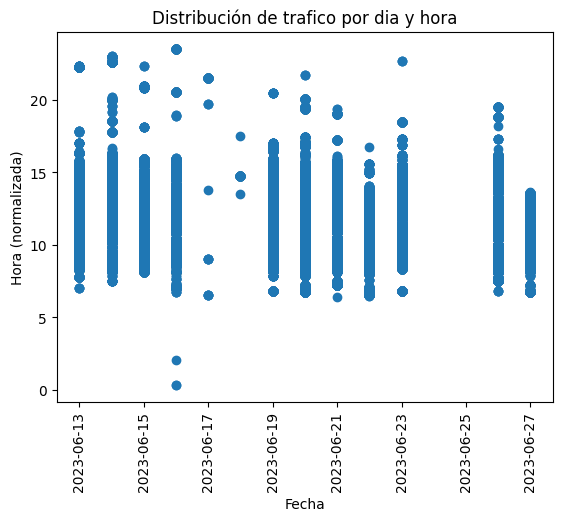

In [17]:
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [18, 7]
plt.locator_params(axis='y', nbins=10)
plt.scatter(df_upa["fdate"], df_upa["fabstime"])
plt.title('Distribución de trafico por dia y hora')
plt.xlabel('Fecha')
plt.ylabel('Hora (normalizada)')

## Regresión lineal
Dado que las horas de concurrencia son marcadas es posible realizar una regresión lineal para predecir las horas en las que se demandará el servidor.

In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression

x=np.array(df_upa["dateunixtimest"]).reshape(-1,1)
y=df_upa["fabstime"]

reg = LinearRegression().fit(x,y)

print(f"Coeficiente (Tetha 1){reg.coef_}")

print(f"Intercepto (Tetha 0) {reg.intercept_}")



Coeficiente (Tetha 1)[-9.04887768e-07]
Intercepto (Tetha 0) 1538.859105055035


Desafortunadamente al intentar realizar la visualización del resultado, obtengo un error de casteo de datos, no lo logré solucionar a tiempo pero dado que el valor del coeficiente es cercano a 0, sé que la línea resultante tiene un ángulo/pendiente muy pequeña, muy similar a un plano recto, lo cuál hace sentido dada la visualización anterior.

In [19]:
y_pred = reg.predict(np.array(df_upa["fdate"].values.astype("float64")).reshape(-1,1))


plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [18, 7]
plt.locator_params(axis='y', nbins=10)
plt.scatter(df_upa["fdate"], df_upa["fabstime"])

plt.plot(x, y_pred, c='red')

Error in callback <function _draw_all_if_interactive at 0x7b86c6afae60> (for post_execute):


ValueError: Date ordinal -84370702.95 converts to -229030-11-11T01:12:00.000000 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

ValueError: Date ordinal -84370702.95 converts to -229030-11-11T01:12:00.000000 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

<Figure size 1800x700 with 1 Axes>

Text(0, 0.5, 'Fecha')

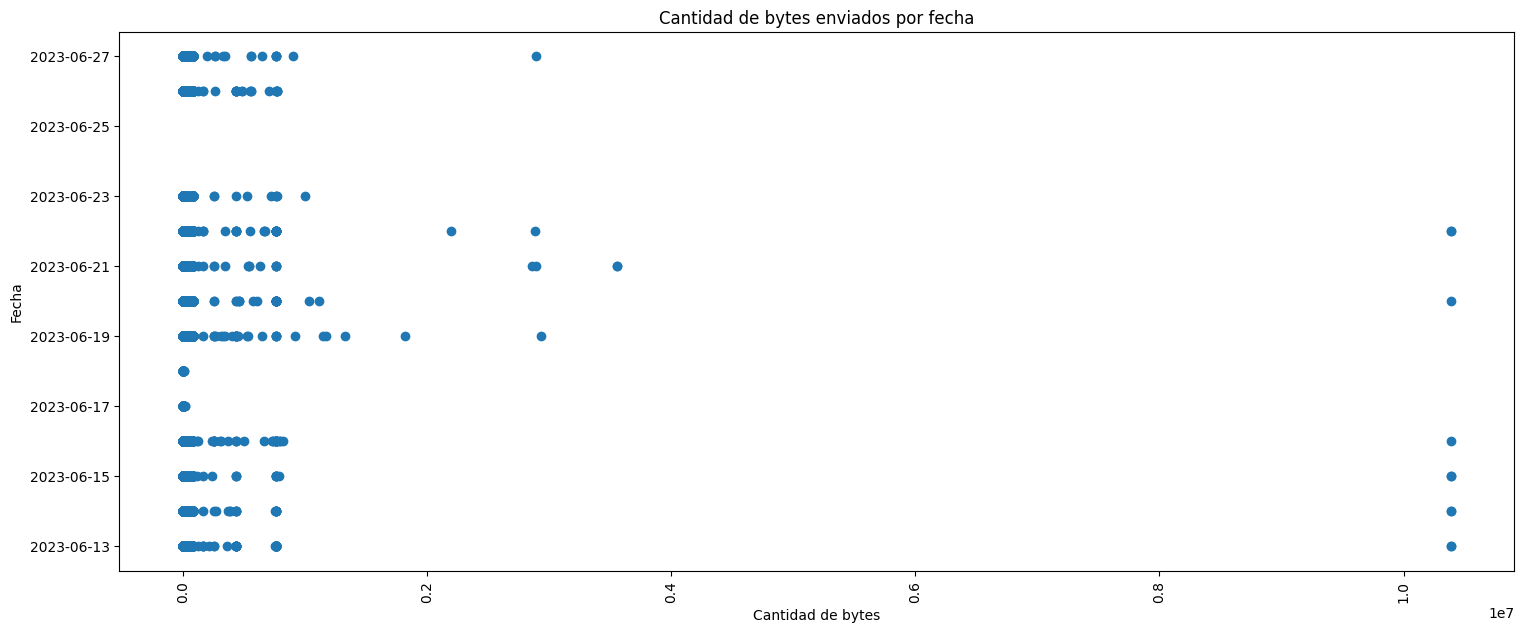

In [20]:
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [18, 7]
#plt.pyplot.figure(figsize=(8, 6), dpi=80)
plt.scatter(df_upa["body_bytes_sent"], df_upa["fdate"])
plt.title('Cantidad de bytes enviados por fecha')
plt.xlabel('Cantidad de bytes')
plt.ylabel('Fecha')

## Clusterización

Para la clusterización se decidió realizar una comparativa entre las cantidad de bytes respondidos y el estatus http

Text(0, 0.5, 'Código HTTP de respuesta')

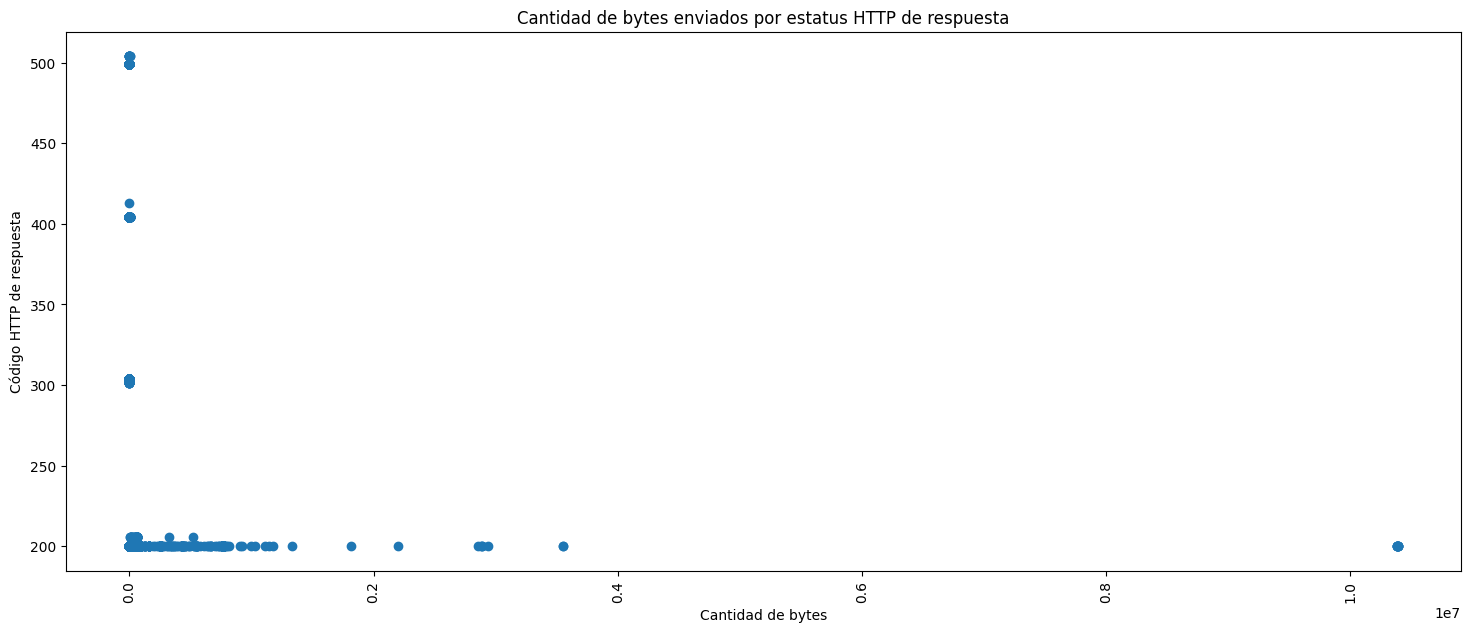

In [21]:
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [18, 7]
#plt.pyplot.figure(figsize=(8, 6), dpi=80)
plt.scatter(df_upa["body_bytes_sent"], df_upa["status"])
plt.title('Cantidad de bytes enviados por estatus HTTP de respuesta')
plt.xlabel('Cantidad de bytes')
plt.ylabel('Código HTTP de respuesta')

Se aplica el analisis de codo el cuál nos da una aproximación a la cantidad de grupos que mejor distribuyen los datos.

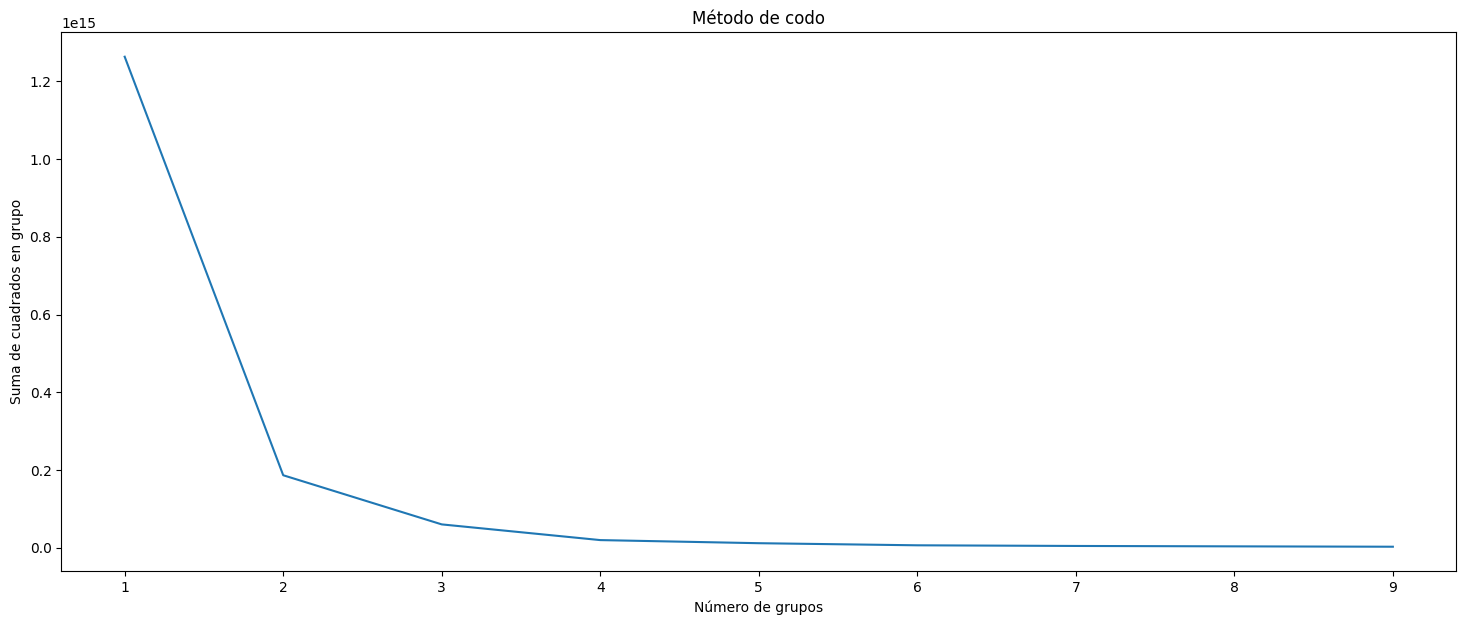

In [22]:
from sklearn.cluster import KMeans


body_status = df_upa.loc[:,["body_bytes_sent", "status"]].values

wcss = []
for i in range(1, 10):
  kmeans = KMeans(n_clusters=i,
  init = 'k-means++', max_iter = 300, n_init = 3)
  kmeans.fit(body_status)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss)
plt.title("Método de codo")
plt.xlabel("Número de grupos")
plt.ylabel("Suma de cuadrados en grupo")
plt.show()

Se puede notar que entre 2 y 3 grupos son los que mejor distribuyen, en este caso yo elegí 3

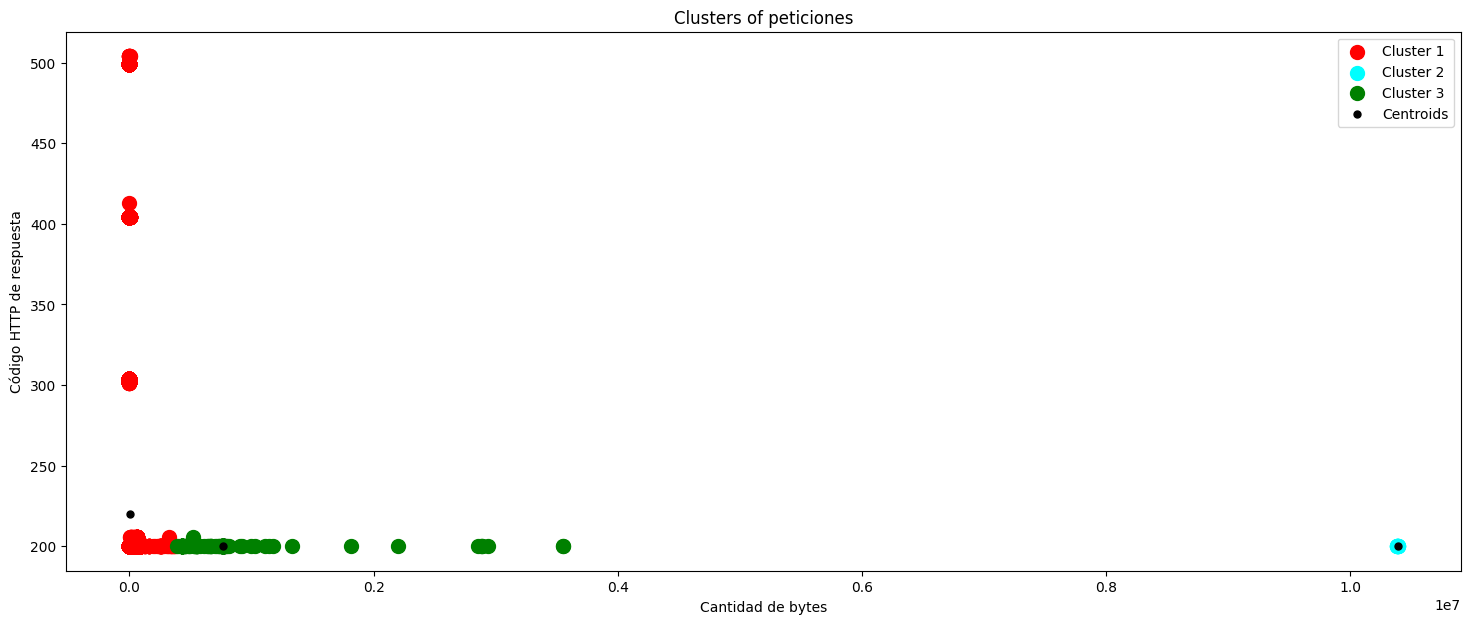

In [23]:
kmeans=KMeans(n_clusters= 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(body_status)

plt.scatter(body_status[y_kmeans == 0, 0], body_status[y_kmeans == 0,1],s = 100, c='red', label = 'Cluster 1')
plt.scatter(body_status[y_kmeans == 1, 0], body_status[y_kmeans == 1,1],s = 100, c='cyan', label = 'Cluster 2')
plt.scatter(body_status[y_kmeans == 2, 0], body_status[y_kmeans == 2,1],s = 100, c='green', label = 'Cluster 3')
#plt.scatter(body_status[y_kmeans == 3, 0], body_status[y_kmeans == 3,1],s = 100, c='cyan', label = 'Cluster 4')
#plt.scatter(body_status[y_kmeans == 4, 0], body_status[y_kmeans == 4,1],s = 100, c='magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 25, c = 'black', label = 'Centroids')

plt.title('Clusters of peticiones')
plt.xlabel('Cantidad de bytes')
plt.ylabel('Código HTTP de respuesta')
plt.legend()
plt.show()
